In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# 1 Reading data
df = pd.read_csv('datatraining.txt', dayfirst=True, parse_dates=['date'])

In [3]:
# 2. Data Re-sampling
df = df.set_index('date')
df = df.resample('5T').mean()
df['Occupancy'] = np.where(df['Occupancy'] < 0.5, 0, df['Occupancy'])
df['Occupancy'] = np.where(df['Occupancy'] >= 0.5, 1, df['Occupancy'])
df['Occupancy'] = df['Occupancy'].astype(np.int64)

In [4]:
print(df.head())

                     Temperature   Humidity    Light         CO2   
date                                                               
2015-02-04 17:50:00    23.157500  27.246125  426.875  714.250000  \
2015-02-04 17:55:00    23.100000  27.200000  420.400  699.100000   
2015-02-04 18:00:00    23.066667  27.144444  419.000  687.708333   
2015-02-04 18:05:00    22.972500  27.251250  104.625  683.000000   
2015-02-04 18:10:00    22.890000  27.423000    0.000  689.300000   

                     HumidityRatio  Occupancy  
date                                           
2015-02-04 17:50:00       0.004782          1  
2015-02-04 17:55:00       0.004757          1  
2015-02-04 18:00:00       0.004738          1  
2015-02-04 18:05:00       0.004729          0  
2015-02-04 18:10:00       0.004735          0  


In [5]:
from sklearn.preprocessing import MinMaxScaler
# 3. Min-Max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)
# print(df)

# df.plot(figsize=(12,6))
# plt.show()

In [16]:
X = df.drop('Occupancy', axis=1) # Drop the target variable column
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [-0.70421352 -1.71359862  1.71241992  0.35481106  1.89262673]


In [20]:
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: 0.8393938205726472


In [21]:
y_pred = regressor.predict(X_test)

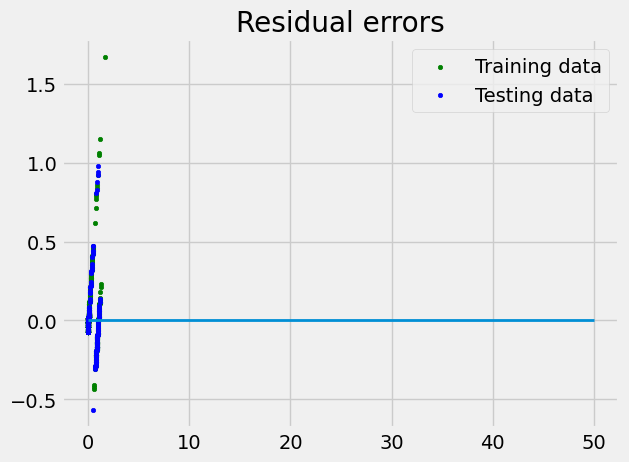

In [22]:
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Training data')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Testing data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [23]:
#y_pred = regressor.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R-squared: ", r2)

Mean squared error:  0.029990116590159724
Mean absolute error:  0.09525155744926
R-squared:  0.8393938205726472
